Utilizzate la linear regression multipla per analizzare il dataframe a questo link https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression utilizzate i dati sulle ore di studio e le ore di sonno , allenate l'algoritmo, testatelo e poi realizzate i vari grafici

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('Student_Performance.csv', sep=',')
print(df.head())


   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [3]:
features = ['Hours Studied', 'Sleep Hours']
X = df[features]


In [4]:
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=features + ['Performance Index'])  # elimina righe con NaN


In [5]:
y = df['Performance Index']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 320.2522962011869
R2 Score: 0.13581986330722773


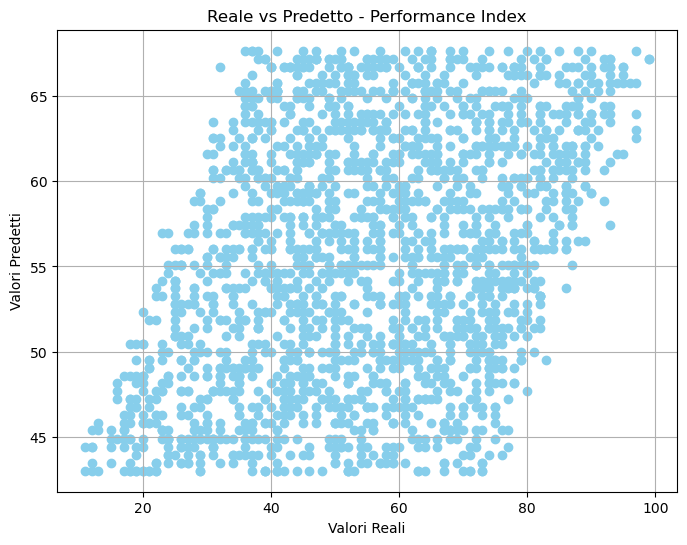

In [8]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, color='skyblue')
plt.xlabel('Valori Reali')
plt.ylabel('Valori Predetti')
plt.title('Reale vs Predetto - Performance Index')
plt.grid(True)
plt.show()


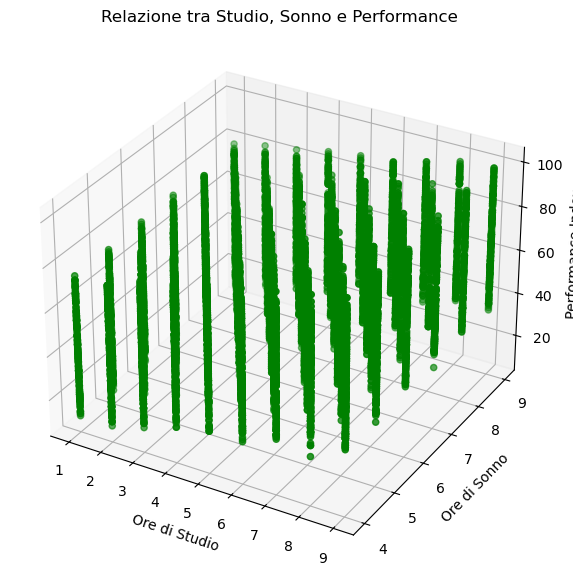

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Hours Studied'], df['Sleep Hours'], df['Performance Index'], color='green')
ax.set_xlabel('Ore di Studio')
ax.set_ylabel('Ore di Sonno')
ax.set_zlabel('Performance Index')
ax.set_title('Relazione tra Studio, Sonno e Performance')
plt.show()


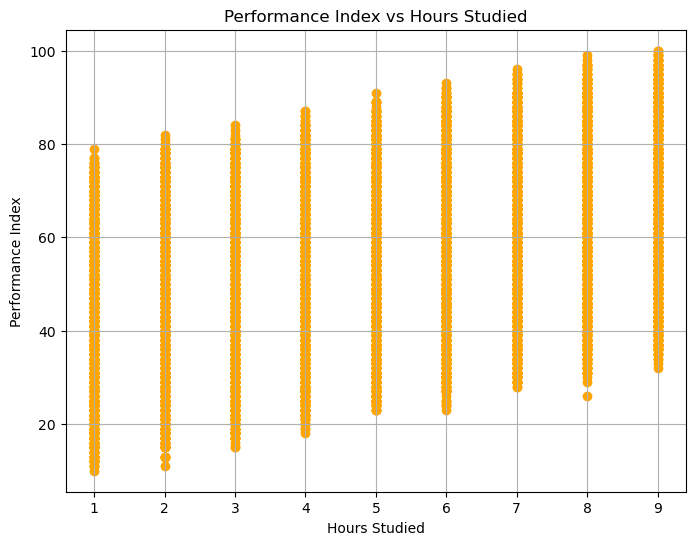

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df['Hours Studied'], df['Performance Index'], color='orange')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Performance Index vs Hours Studied')
plt.grid(True)
plt.show()


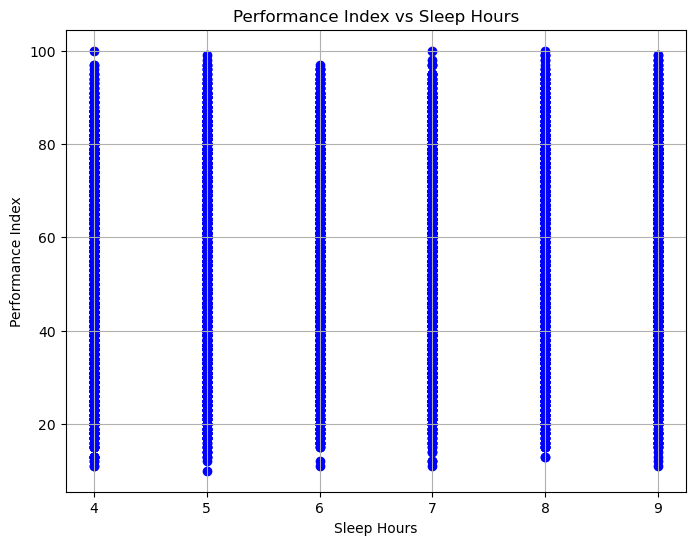

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df['Sleep Hours'], df['Performance Index'], color='blue')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Performance Index vs Sleep Hours')
plt.grid(True)
plt.show()


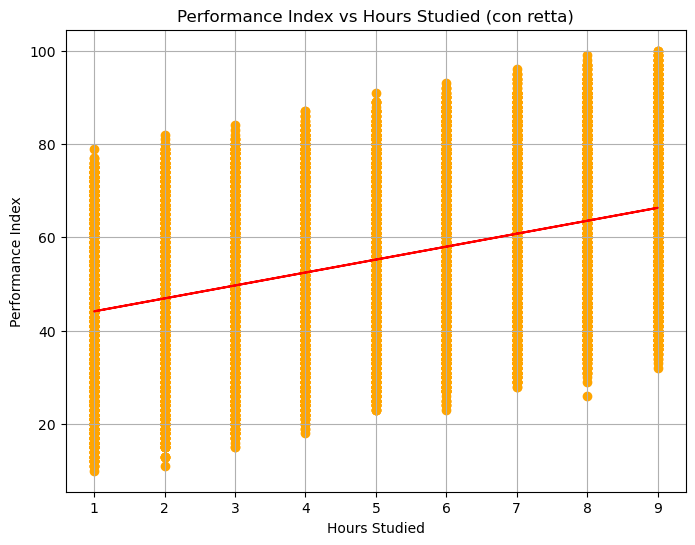

In [12]:
import numpy as np

x = df['Hours Studied']
y = df['Performance Index']
m, b = np.polyfit(x, y, 1)  # coeff. retta

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='orange')
plt.plot(x, m*x + b, color='red')  # retta
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Performance Index vs Hours Studied (con retta)')
plt.grid(True)
plt.show()


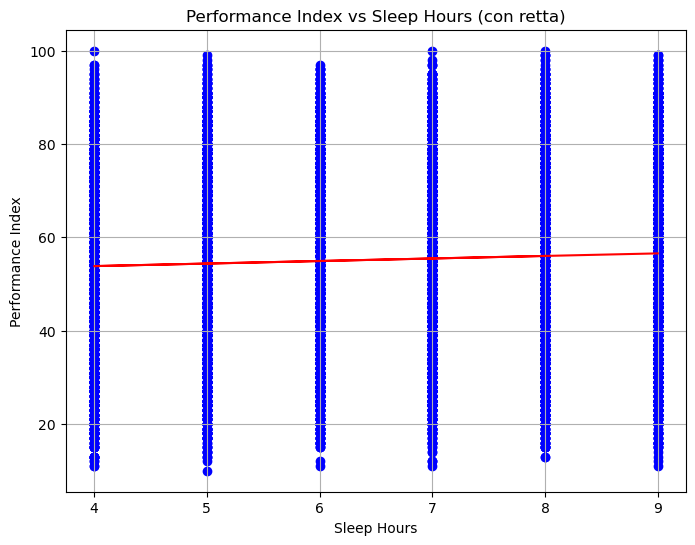

In [13]:
x = df['Sleep Hours']
y = df['Performance Index']
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue')
plt.plot(x, m*x + b, color='red')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Performance Index vs Sleep Hours (con retta)')
plt.grid(True)
plt.show()
